# __Hypothysis testing Algerian Forest Fire Dataset__

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
data = pd.read_csv(r"../Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data

In [ ]:
data[data.isna().any(axis=1)]
data.iloc[121:125,:]
data.drop([122,123],inplace=True)
data.reset_index(inplace=True)
data.drop(['index',"day","month","year"],axis=1,inplace=True)
data["region"] = None
data.iloc[:122,-1] = "Bejaia"
data.iloc[122:,-1] = "Abbes"
data

# __Data cleaning operations__

In [ ]:
data.info()

Getting unique values from y data column:  
* Getting unique values from a column involves identifying and selecting only the distinct or unique values in that column.

In [ ]:
data["Classes  "].unique()

Apply `str.strip()` to clean the data:  
* As we can see y data has some blank spaces so we need to remove then before use.  
* I have used the `.strip()` method in Python to remove the leading and trailing spaces from the data in a column.

In [10]:
data["Classes  "] = data["Classes  "].str.strip()

In [12]:
data["Classes  "].unique()

array(['not fire', 'fire'], dtype=object)

Convert data type of all data column:  
* In below code I am selecting all data which are intiger and making the column data type as float64

In [ ]:
columns = data.columns[:-2]
for i in columns:
    data[i] = data[i].astype("float64")
data.info()

# __Hypothysis testing__

What is a Mann-Whitney U test?  

* The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric statistical test used to compare two independent groups of data that are not normally distributed. It is a useful alternative to the t-test, which assumes that the data is normally distributed.  


In [14]:
from scipy.stats import ttest_ind
ttest_ind(data[data["Classes  "] == "fire"]["Temperature"],data[data["Classes  "] != "fire"]["Temperature"])

Ttest_indResult(statistic=9.423536449577796, pvalue=3.665914717669193e-18)

* there is a significant difference in distributions for `Temperature` when fire and not fire

In [15]:
from scipy.stats import mannwhitneyu
mannwhitneyu(data[data["Classes  "] == "fire"][" RH"],data[data["Classes  "] != "fire"][" RH"])

MannwhitneyuResult(statistic=3700.5, pvalue=3.7651087930605746e-11)

* there is a significant difference in distributions for `RH` when fire and not fire

In [16]:
mannwhitneyu(data[data["Classes  "] == "fire"][" Ws"],data[data["Classes  "] != "fire"][" Ws"])

MannwhitneyuResult(statistic=7148.0, pvalue=0.7601300563655673)

* there is no significant difference in distributions for `Ws` when fire and not fire

In [17]:
mannwhitneyu(data[data["Classes  "] == "fire"]["Rain "],data[data["Classes  "] != "fire"]["Rain "])

MannwhitneyuResult(statistic=2013.0, pvalue=3.0087110412485163e-26)

* there is a significant difference in distributions for `Rain` when fire and not fire

In [18]:
mannwhitneyu(data[data["Classes  "] == "fire"]["FFMC"],data[data["Classes  "] != "fire"]["FFMC"])

MannwhitneyuResult(statistic=14604.0, pvalue=1.3687976313621596e-40)

* there is a significant difference in distributions for `FFMC` when fire and not fire

In [19]:
mannwhitneyu(data[data["Classes  "] == "fire"]["DMC"],data[data["Classes  "] != "fire"]["DMC"])

MannwhitneyuResult(statistic=13419.5, pvalue=5.619625810682857e-29)

* there is a significant difference in distributions for `DMC` when fire and not fire

In [20]:
mannwhitneyu(data[data["Classes  "] == "fire"]["DC"],data[data["Classes  "] != "fire"]["DC"])

MannwhitneyuResult(statistic=13012.5, pvalue=1.8727139327610821e-25)

* there is a significant difference in distributions for `DC` when fire and not fire

In [21]:
mannwhitneyu(data[data["Classes  "] == "fire"]["ISI"],data[data["Classes  "] != "fire"]["ISI"])

MannwhitneyuResult(statistic=14610.0, pvalue=1.1675868001492136e-40)

In [22]:
mannwhitneyu(data[data["Classes  "] == "fire"]["BUI"],data[data["Classes  "] != "fire"]["BUI"])

MannwhitneyuResult(statistic=13398.0, pvalue=8.749537975061532e-29)

In [23]:
mannwhitneyu(data[data["Classes  "] == "fire"]["FWI"],data[data["Classes  "] != "fire"]["FWI"])

MannwhitneyuResult(statistic=14481.5, pvalue=2.615638636647991e-39)

* We can validate the findings in Hypothysis testing with below `pairplot`  
  
* `Ws` has almost same distribution for `fire` and `non-fire` data

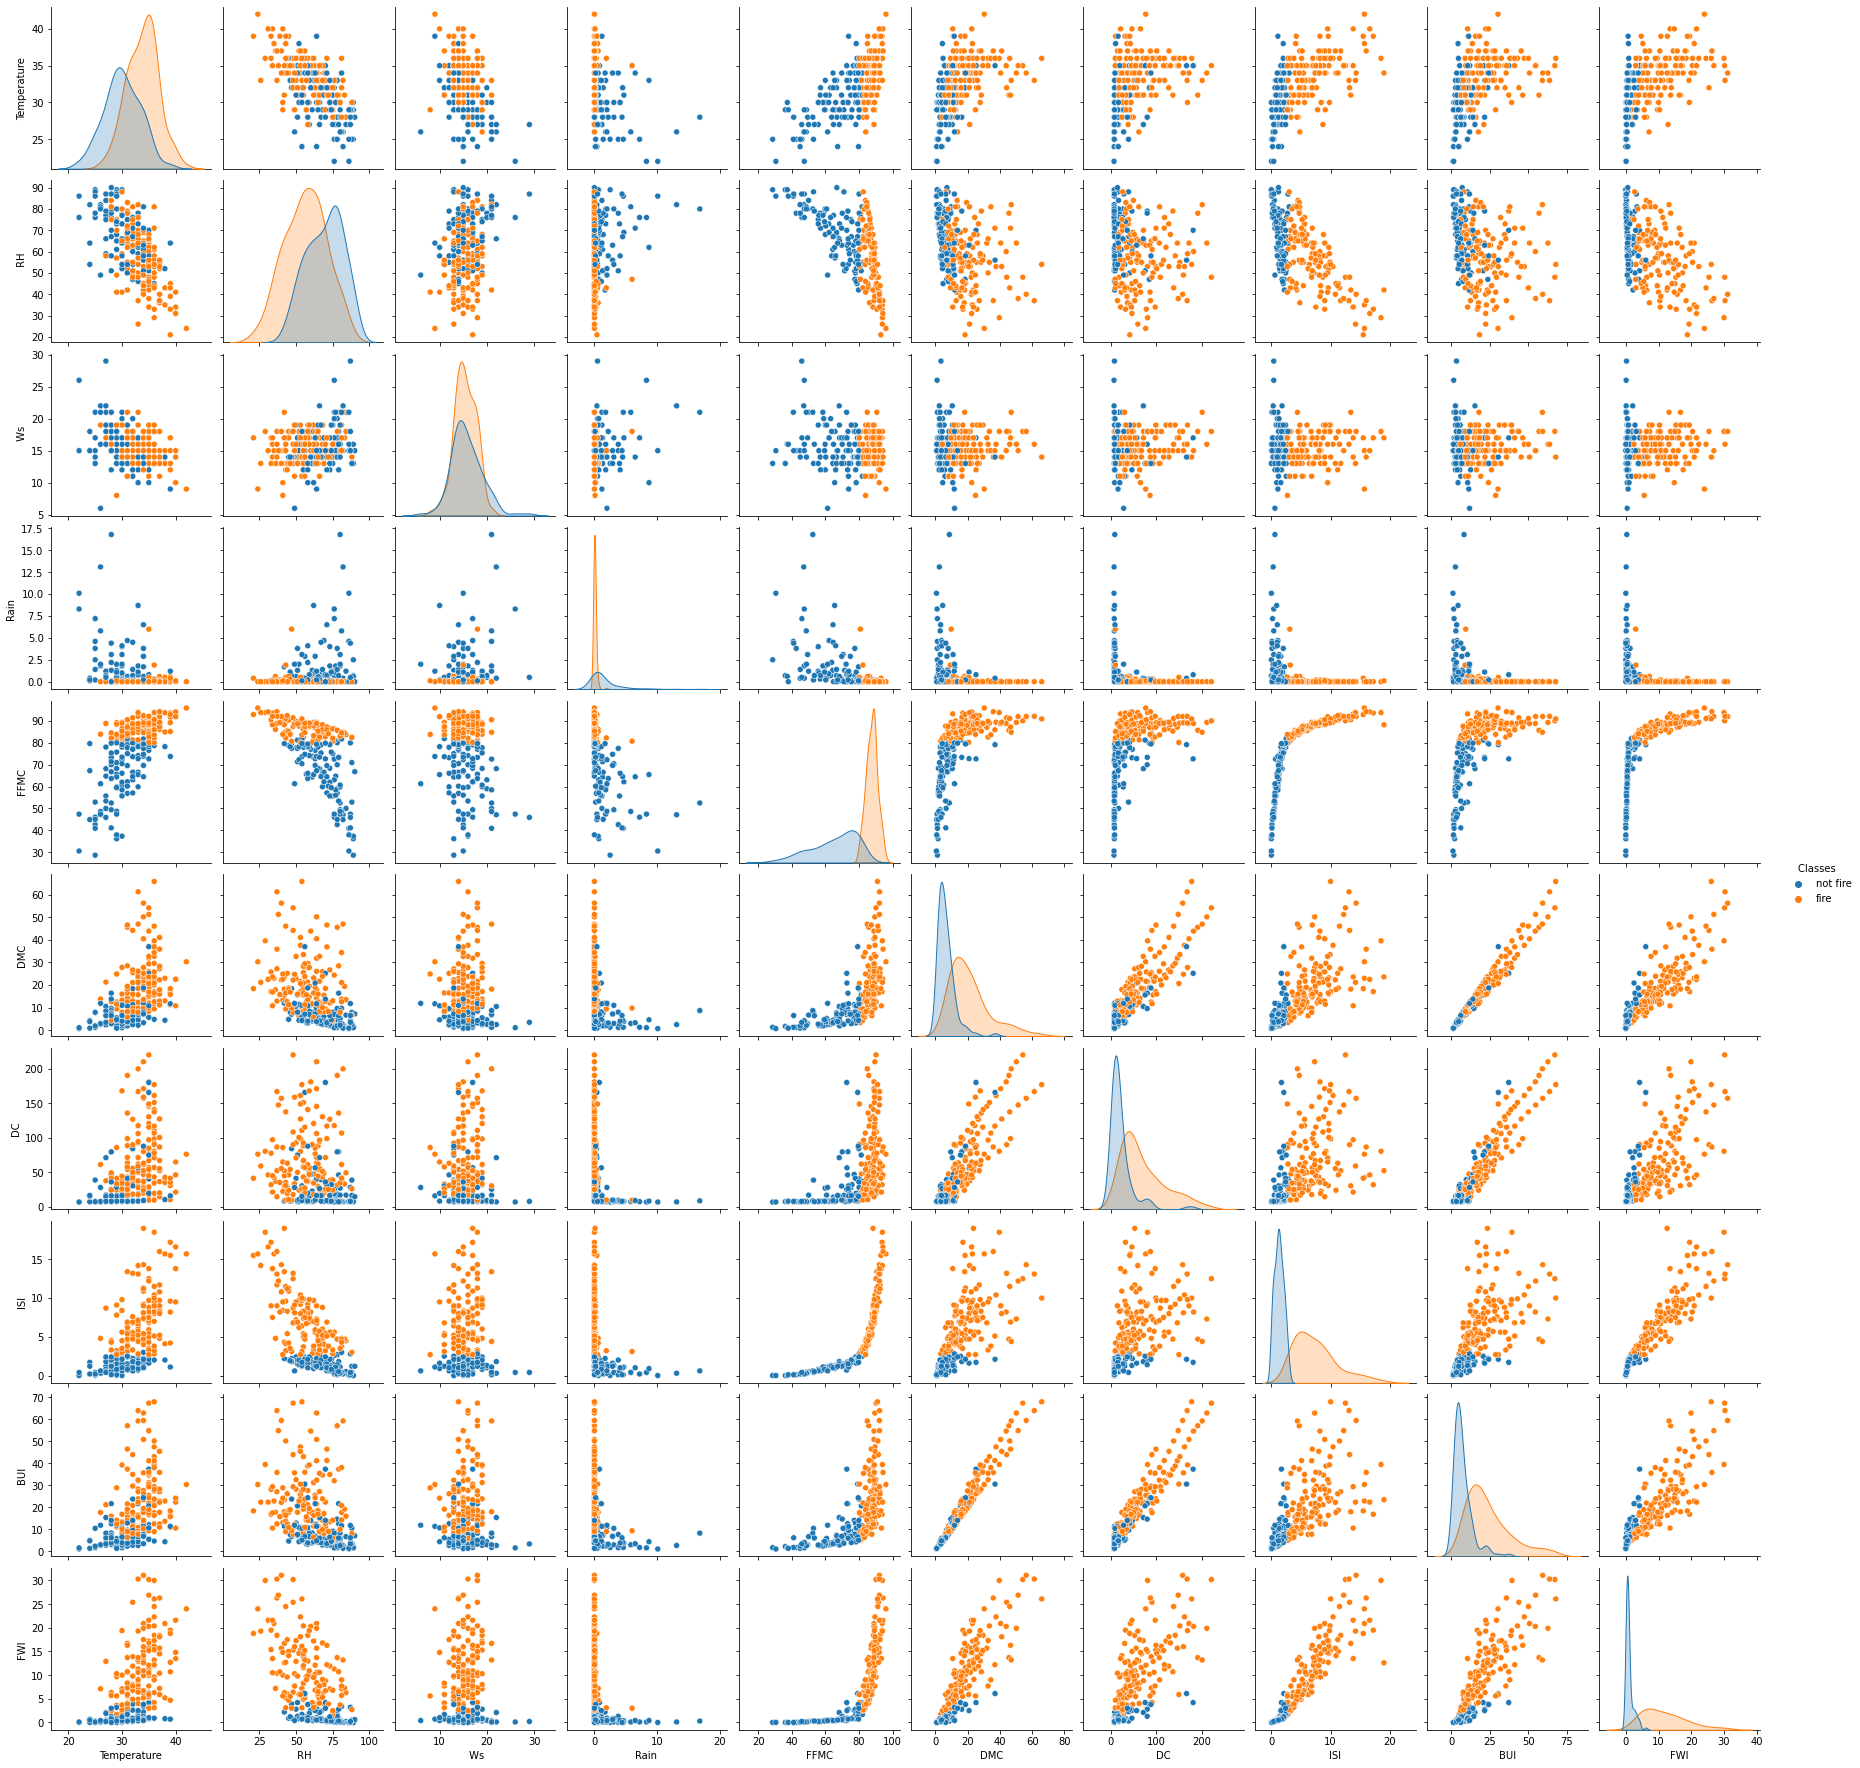

In [24]:
sns.pairplot(data,hue="Classes  ")

* Now we are need to test `Region` has any impact on `fire` or not  
  
* since `Region` and `Classes` both are categorical data so I am using `fisher_exact` for testing

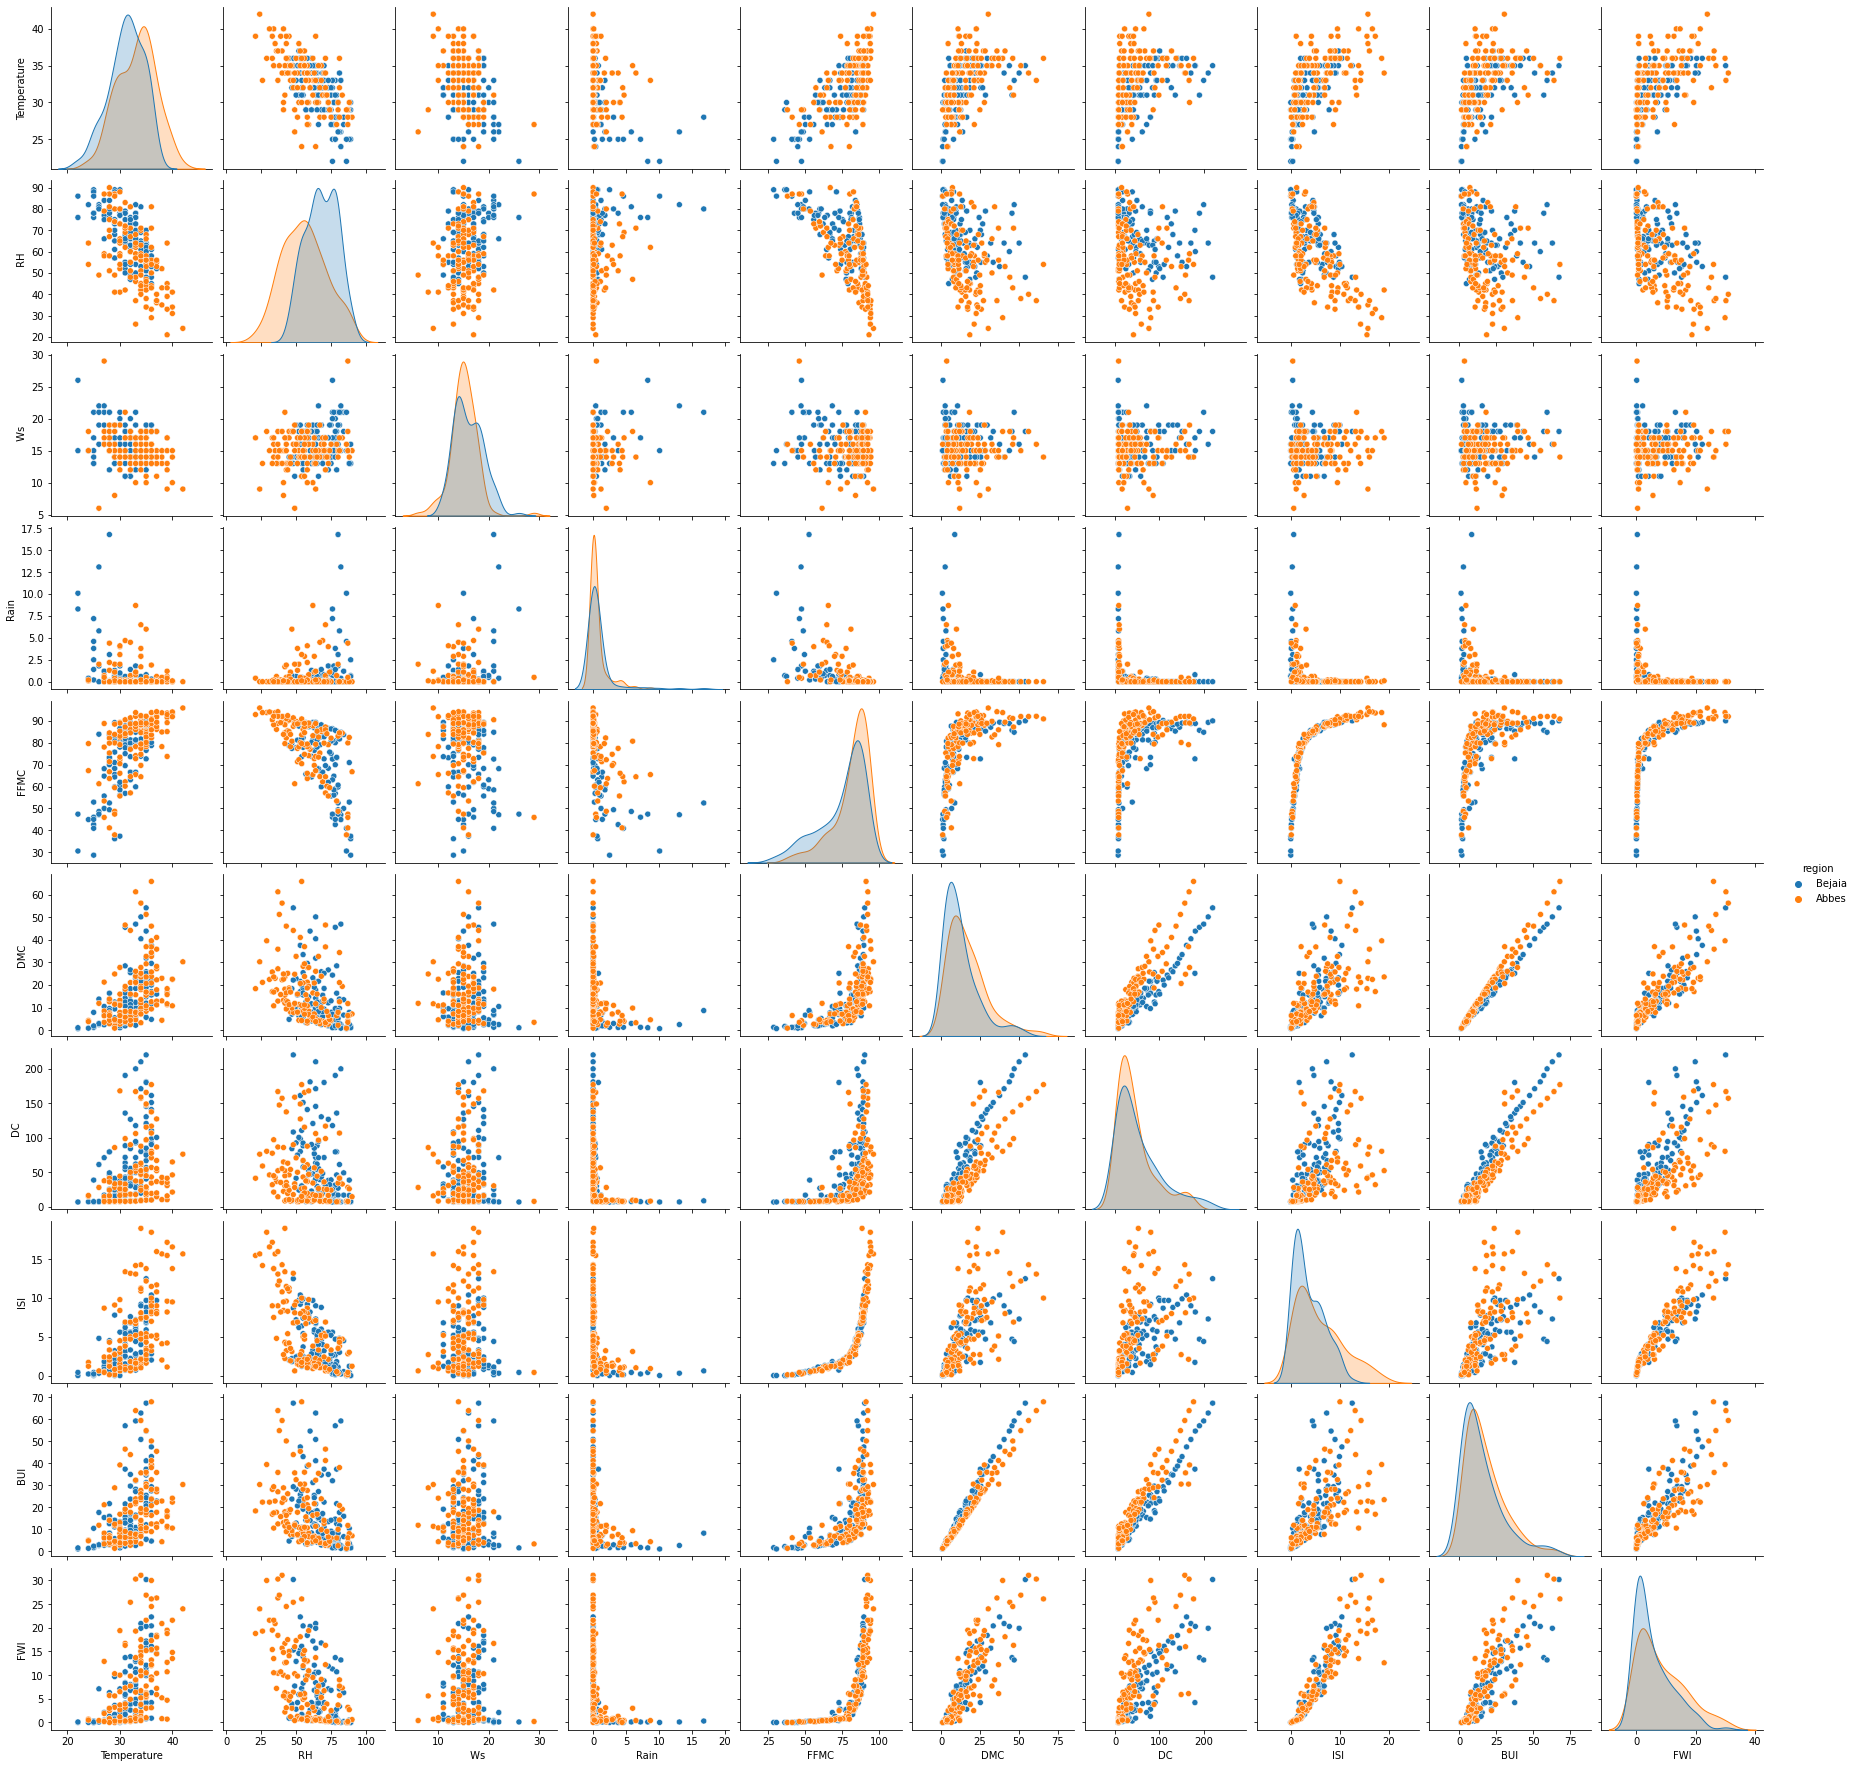

In [25]:
sns.pairplot(data,hue="region")

In [26]:
data_crosstab = pd.crosstab(data["Classes  "],data["region"],margins = False)
print(data_crosstab)

region     Abbes  Bejaia
Classes                 
fire          79      59
not fire      43      63


what is a fisher_exact?  
  
* The output of the Fisher's exact test includes the odds ratio, the confidence interval for the odds ratio, and the p-value. If the p-value is less than the significance level (usually 0.05), the null hypothesis of independence is rejected, and it is concluded that there is a significant association between the two categorical variables. Conversely, if the p-value is greater than the significance level, the null hypothesis cannot be rejected, and it is concluded that there is no significant association between the two categorical variables.

In [27]:
from scipy.stats import fisher_exact
fisher_exact(data_crosstab)

(1.9617658651951124, 0.013954999729002686)

In [28]:
fisher_exact(data_crosstab,alternative="greater")

(1.9617658651951124, 0.006977499864501343)

* The P-value for `fire` and `region` is `0.006977499864501343` which is less then 0.05 to we reject the null hypothesis.  
* i.e there is a significant association between the two categorical variables.

I am converting Rain from numerical to categorical data.  
Reason is While analysing the data I found that rain has 52-56% zero values.  
  
And from EDA for rain, we can see where is rain change for fire is very less, 

So I am changing this dataset from numerical to categorical data.  
  
I will put `rain` if rain > 0 else `not rain`

In [29]:
data["Rain "] = data["Rain "].apply(lambda x: 'not rain' if x == 0 else 'rain')

In [30]:
data_crosstab = pd.crosstab(data["Classes  "],data["Rain "],margins = False)
print(data_crosstab)

Rain       not rain  rain
Classes                  
fire            114    24
not fire         19    87


In [31]:
fisher_exact(data_crosstab)

(21.75, 7.112449017362336e-25)

In [32]:
fisher_exact(data_crosstab,alternative="greater")

(21.75, 3.8242593558010855e-25)

* The P-value for `fire` and `Rain` is `3.8242593558010855e-25` which is less then 0.05 to we reject the null hypothesis.  
* i.e there is a significant association between the two categorical variables.

Summarize dataset:  95%|█████████▌| 101/106 [00:08<00:00,  8.41it/s, Missing diagram matrix]         /home/sanjiv/anaconda3/lib/python3.9/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Matrix missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Matrix": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_co

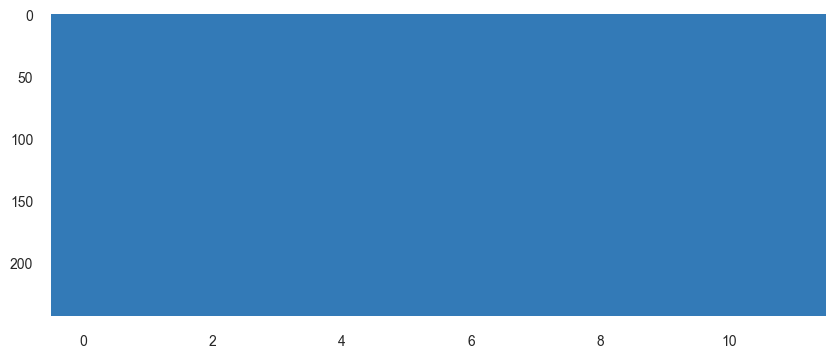

In [50]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, explorative=True)

#Saving results to a HTML file
profile.to_file("pandas_profiling.html")

In [51]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(data)

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
